In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from keras.utils import to_categorical 
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils 

In [2]:
traindata = pd.read_csv('sign_mnist_train.csv')
print(traindata.shape)
traindata.head()

(27455, 785)


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [3]:
y_train=traindata['label'].values

In [4]:
traindata.drop('label',axis=1,inplace=True)

In [5]:
# Find the unique numbers from the train labels
classes = np.unique(y_train)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  24
Output classes :  [ 0  1  2  3  4  5  6  7  8 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]


In [6]:
x_train=traindata.values

In [7]:
testdata = pd.read_csv('sign_mnist_test.csv')
print(traindata.shape)
traindata.head()

(27455, 784)


,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,107,118,127,134,139,143,146,150,153,156,...,207,207,207,207,206,206,206,204,203,202
1,155,157,156,156,156,157,156,158,158,157,...,69,149,128,87,94,163,175,103,135,149
2,187,188,188,187,187,186,187,188,187,186,...,202,201,200,199,198,199,198,195,194,195
3,211,211,212,212,211,210,211,210,210,211,...,235,234,233,231,230,226,225,222,229,163
4,164,167,170,172,176,179,180,184,185,186,...,92,105,105,108,133,163,157,163,164,179


In [8]:
y_test=testdata['label'].values


In [9]:
testdata.drop('label',axis=1,inplace=True)

In [10]:
# Find the unique numbers from the test labels
classes_test = np.unique(y_test)
nClasses_test = len(classes_test)
print('Total number of outputs : ', nClasses_test)
print('Output classes : ', classes_test)

Total number of outputs :  24
Output classes :  [ 0  1  2  3  4  5  6  7  8 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]


In [11]:
x_test=testdata.values

In [12]:
print("x_train shape", x_train.shape)
print("y_train shape", y_train.shape)
print("x_test shape", x_test.shape)
print("y_test shape", y_test.shape)

x_train shape (27455, 784)
y_train shape (27455,)
x_test shape (7172, 784)
y_test shape (7172,)


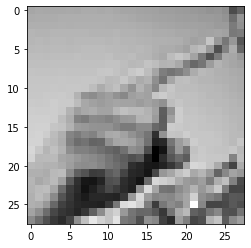

In [13]:
# Display the first image in training data
import matplotlib.pyplot as plt
plt.imshow(x_train[1].reshape(28,28),cmap='gray')

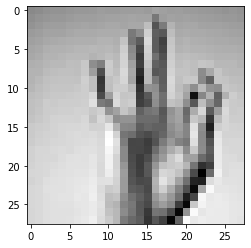

In [14]:
# Display the first image in testing data
import matplotlib.pyplot as plt
plt.imshow(x_test[1].reshape(28,28),cmap='gray')

In [15]:
x_train = x_train.reshape(27455, 784)#reshape 27,455 28 x 28 matrices into 60,000 784-length vectors
x_test = x_test.reshape(7172, 784)# reshape 7172 28 x 28 matrices into 10,000 784-length vectors.
x_train.shape, x_test.shape

((27455, 784), (7172, 784))

The data right now is in an int8 format, so before  feed it into the network we need to convert its type to float32, and  also have to rescale the pixel values in range 0 - 1 inclusive.

In [16]:
x_train = x_train.astype('float32')# change integers to 32-bit floating point numbers
x_test = x_test.astype('float32')# change integers to 32-bit floating point numbers
x_train = x_train / 255.# normalize each value for each pixel for the entire vector for each input
x_test = x_test / 255.

convert the class labels into a one-hot encoding vector.

In [17]:
# Change the labels from categorical to one-hot encoding
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

# Display the change for category label using one-hot encoding
print('Original label:', y_train[0])
print('After conversion to one-hot:', y_train_one_hot[0])

Original label: 3
After conversion to one-hot: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


In [18]:
print("Training matrix shape", x_train.shape)
print("Testing matrix shape", x_test.shape)

Training matrix shape (27455, 784)
Testing matrix shape (7172, 784)


In [19]:

nb_classes = 25 # number of unique digits

y_train = np_utils.to_categorical(y_train, nb_classes)
y_test = np_utils.to_categorical(y_test, nb_classes)


The Sequential model is a linear stack of layers and is very common.



The first hidden layer

In [21]:
model = Sequential()
# The first hidden layer is a set of 32 nodes (artificial neurons).
# Each node will receive an element from each input vector and apply some weight and bias to it.
model.add(Dense(26, input_shape=(784,))) #(784,) is not a typo -- that represents a 784 length vector!

# An "activation" is a non-linear function applied to the output of the layer above.
# It checks the new value of the node, and decides whether that artifical neuron has fired.
# The Rectified Linear Unit (ReLU) converts all negative inputs to nodes in the next layer to be zero.
# Those inputs are then not considered to be fired.
# Positive values of a node are unchanged.

model.add(Activation('relu'))
# Dropout zeroes a selection of random outputs (i.e., disables their activation)
# Dropout helps protect the model from memorizing or "overfitting" the training data.
model.add(Dropout(0.25))

Adding the second hidden layer

In [22]:
# The second hidden layer appears identical to our first layer.
# However, instead of each of the 32-node receiving 784-inputs from the input image data,
# they receive 32 inputs from the output of the first 32-node layer.

model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.25))

Adding the third hidden laye

In [24]:
model.add(Dense(784))
model.add(Activation('relu'))
model.add(Dropout(0.25))

The Final Output Layer

In [25]:
# The final layer of 25 neurons in fully-connected to the previous 512-node layer.
# The final layer of a FCN should be equal to the number of desired classes (25 in this case).
model.add(Dense(25))

In [26]:
# The "softmax" activation represents a probability distribution over K different possible outcomes.
# Its values are all non-negative and sum to 1.

model.add(Activation('softmax'))

In [27]:
# Summarize the built model

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 26)                20410     
_________________________________________________________________
activation_1 (Activation)    (None, 26)                0         
_________________________________________________________________
dropout (Dropout)            (None, 26)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                1728      
_________________________________________________________________
activation_2 (Activation)    (None, 64)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 784)              

<b>Compiling the model<b>

In [28]:
from tensorflow import keras
opt = keras.optimizers.Adam(learning_rate=0.01)

In [29]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

<b> train the model <b>

In [30]:
model.fit(x_train, y_train,batch_size=32, epochs=20,verbose=1)

Epoch 1/20
858/858 [==============================] - 13s 15ms/step - loss: 3.0495 - accuracy: 0.0778
Epoch 2/20
858/858 [==============================] - 13s 15ms/step - loss: 2.6767 - accuracy: 0.1289
Epoch 3/20
858/858 [==============================] - 15s 17ms/step - loss: 2.4524 - accuracy: 0.1733
Epoch 4/20
858/858 [==============================] - 13s 15ms/step - loss: 2.3410 - accuracy: 0.19799s - loss: 2.3813 - accuracy - ETA: 8s - loss: 2.3760 -  - ETA: 4s - loss: 2.3
Epoch 5/20
858/858 [==============================] - 13s 15ms/step - loss: 2.2595 - accuracy: 0.2169
Epoch 6/20
858/858 [==============================] - 13s 15ms/step - loss: 2.2139 - accuracy: 0.2319
Epoch 7/20
858/858 [==============================] - 13s 16ms/step - loss: 2.1986 - accuracy: 0.2366
Epoch 8/20
858/858 [==============================] - 13s 15ms/step - loss: 2.1515 - accuracy: 0.2560
Epoch 9/20
858/858 [==============================] - 13s 16ms/step - loss: 2.1090 - accuracy: 0.2686
Epoc

In [31]:
score = model.evaluate(x_test, y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

225/225 [==============================] - 1s 6ms/step - loss: 1.9855 - accuracy: 0.3166
Test score: 1.9855303764343262
Test accuracy: 0.31664806604385376


In [32]:
import warnings
warnings.filterwarnings('ignore')

In [33]:
# The predict_classes function outputs the highest probability class
# according to the trained classifier for each input example.
predicted_classes = model.predict_classes(x_test)

# Check which items we got right / wrong
correct_indices = np.nonzero(predicted_classes == y_test)[0]

incorrect_indices = np.nonzero(predicted_classes != y_test)[0]

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


<Figure size 432x288 with 0 Axes>

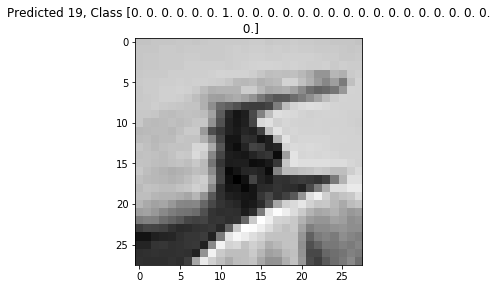

In [34]:
plt.figure()

for i, correct in enumerate(correct_indices[:26]):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))
    
plt.tight_layout()
    
plt.figure(figsize = (15,15))
for i, incorrect in enumerate(incorrect_indices[:26]):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))
    
plt.tight_layout()
